<a href="https://colab.research.google.com/github/MaryamNourii/ChatBot/blob/main/PercQA_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wordcloud-fa
!pip install nltk

In [ ]:
import re
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import nltk
from nltk import *
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud_fa import WordCloudFa


In [ ]:
nltk.download('punkt')

In [ ]:
data = pd.read_csv("PerCQA.csv")

In [ ]:
final_df = data[["QBody","CBodyClean"]].copy()

In [ ]:
final_df = final_df.rename(columns={"QBody":'Q', "CBodyClean":'ans'})

In [ ]:
final_df.head(10)

,Q,ans
0,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,پسرم یه ماه دیگه میشه سه سال.قدش حدودا دو ماه ...
1,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,نمیدونم پسرم 25 ماهشه قدش 95. خودتون قدتون چجو...
2,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,من پسرم دوسال ونه ماهش هس قد93وزن 13ترخدا بگید...
3,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,عزیزم بچه هارو مقایسه نکن .حتی خواهر بردار ها ...
4,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,دختر منم 3 سالشه قدش یه ماه پیش 89 بود وزنش سی...
5,در بازار تهران آدرس بديد . كيك خامه اي مصنوعي ...,تو همون شیرینی فروشی ماکتشو درست میکنن میفروشن...
6,در بازار تهران آدرس بديد . كيك خامه اي مصنوعي ...,ینی چی مصنوعی؟
7,در بازار تهران آدرس بديد . كيك خامه اي مصنوعي ...,اگر منظورت ماکته اونا سفارشین عزیزم اکثر قنادی...
8,در بازار تهران آدرس بديد . كيك خامه اي مصنوعي ...,میدونم تزیینی فروشیه ادرس مغازه میخام
9,در بازار تهران آدرس بديد . كيك خامه اي مصنوعي ...,نان فانتزی تندیر داره. البته فککنم داشته باشه....


In [ ]:
final_df = final_df.dropna(axis=0).reset_index(drop=True)
final_df

,Q,ans
0,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,پسرم یه ماه دیگه میشه سه سال.قدش حدودا دو ماه ...
1,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,نمیدونم پسرم 25 ماهشه قدش 95. خودتون قدتون چجو...
2,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,من پسرم دوسال ونه ماهش هس قد93وزن 13ترخدا بگید...
3,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,عزیزم بچه هارو مقایسه نکن .حتی خواهر بردار ها ...
4,دخترم۳سالو نیمه قدش ۹۵ وزنش۱۴ خوبه یا کمه,دختر منم 3 سالشه قدش یه ماه پیش 89 بود وزنش سی...
...,...,...
21935,دختر من 17ماهش هست. اما شش تادندان بیشتر نداره...,دقیقا...من پسرمو هرچی بهداشت گفت گوش دادم هنوز...
21936,دختر من 17ماهش هست. اما شش تادندان بیشتر نداره...,درسته دکترهم گفت شیرمادرکلا تا6 ماهگی به دردبچ...
21937,دختر من 17ماهش هست. اما شش تادندان بیشتر نداره...,نگران نباش بابا ..پسر منم 18 ماهه است و6 تا دن...
21938,دختر من 17ماهش هست. اما شش تادندان بیشتر نداره...,دخترم 15 ماهشه 5 تا داره جای نگرانی نیست


In [ ]:
final_df[final_df['Q'].isnull()]

,Q,ans


In [ ]:
final_df[final_df['ans'].isnull()]

,Q,ans


In [ ]:
final_df['Q_text_length'] = final_df['Q'].astype(str).apply(len)
# final_df['Q_text_word_count'] = final_df['QBody'].apply(lambda x: len(str(x).split()))

final_df['A_text_length'] = final_df['ans'].astype(str).apply(len)
# final_df['A_text_word_count'] = final_df['CBodyClean'].apply(lambda x: len(str(x).split()))

<ipython-input-92-bff453dc1d07>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Q_text_length'])


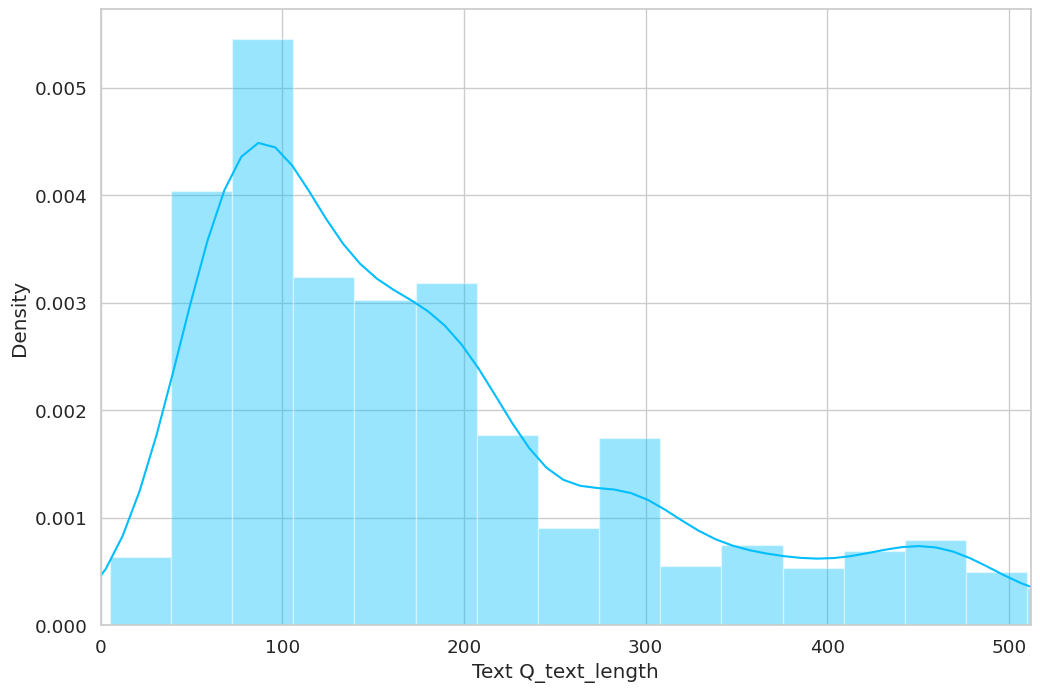

In [ ]:
sns.distplot(final_df['Q_text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Q_text_length');

<ipython-input-93-0d3729dfd1aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['A_text_length'])


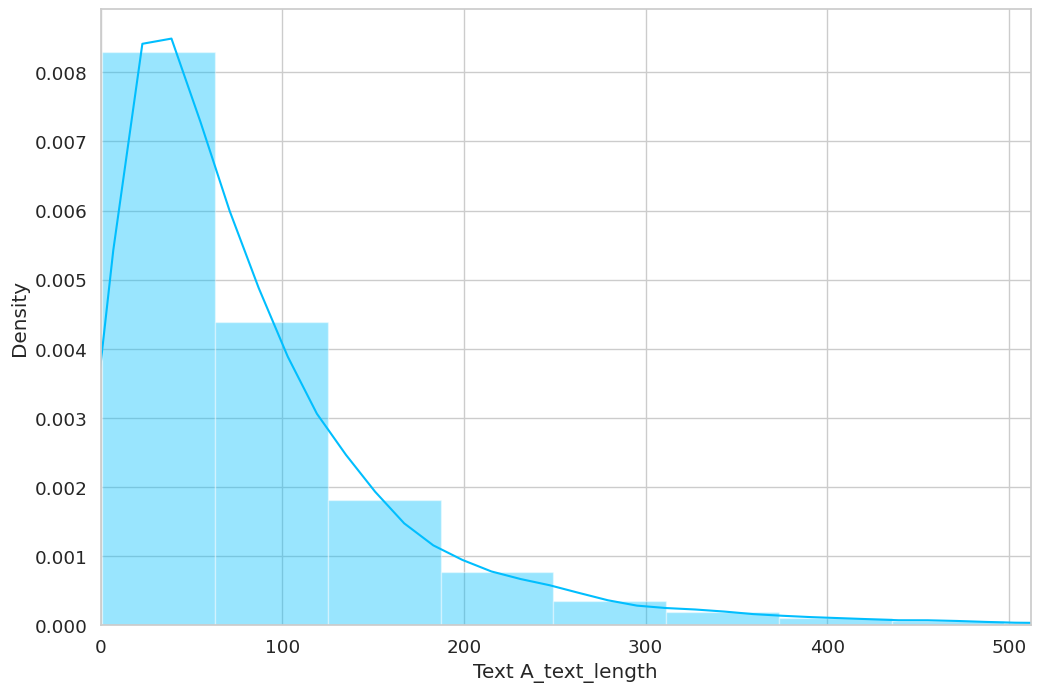

In [ ]:
sns.distplot(final_df['A_text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text A_text_length');

In [ ]:
def text_normalizer(text):

    tokens = nltk.word_tokenize(text)
    newfile=''
    for word in tokens:
        word = word.replace(" ", "").replace("\u200c", "").replace("=", "= ").upper().replace("+", "+ ").upper().replace("^", "^ ").upper().replace("/", "/ ").upper().replace("-", "- ").upper().replace(")", ") ").upper().replace(".", ". ").upper().replace("!", "! ").upper().replace("؟", "؟ ").upper().replace("\ufeff\n","").lower().replace(
            "،", "، ").upper().replace("*", "* ").upper().replace("٪", "٪ ").upper().replace('ة' , 'ه').replace('ي', 'ی').replace("؛" , '؛ ').upper().replace("!" , ' !').lower().replace("؛" , ' ؛').lower().replace("." , ' .').lower().replace("؟" , " ؟").lower().replace(
            "،", " ،").lower().replace(")", " )").lower().replace("^", " ^").lower().replace("=", " =").lower().replace("+", " +").lower().replace("*", " *").lower().replace("-", " -").upper().replace("/", " /").lower().replace("٪", " ٪").lower().replace('\xa0','').replace('ک' , 'ك').replace('\d+', '').replace('#', '').replace('_', '').replace('@', '').replace('username', '').replace('پ' , 'ب')
        newfile = newfile + ' ' + word

    return newfile

def remove_emojis( text):

    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)    
    return emoji_pattern.sub(r'', text)

def remove_english_words( text):
    return re.sub(r'[A-Za-z]+', '' , text)

def remove_hashtags( text):
    text = re.sub(r"#[A-Za-z0-9_]+","", text)
    text = re.sub(r"#[\u06F0-\u06F9\u0660-\u0669\u0621-\u0628\u062A-\u063A\u0641-\u0642\u0644-\u0648\u064E-\u0651\u0655\u067E\u0686\u0698\u06A9\u06AF\u06BE\u06CC_]+","", text)
    return text

def remove_numbers( text):
    for i, j in zip('۱۲۳۴۵۶۷۸۹۰', '1234567890'):
      text = text.replace(i, j)
    for i, j in zip('۱۲۳٤٥٦۷۸۹۰', '1234567890'):
      text = text.replace(i, j)
    return re.sub(r"[0-9]+","", text)

def remove_mentions( text):
    return re.sub(r"@[A-Za-z0-9_]+","", text)

def sentence_tokenize( text):
    pattern = re.compile(r'[.!؟؛?\n][ ]*')
    return pattern.split(text)

def word_tokenize( sentence):
    return re.findall(r"[\w']+", sentence)

def remove_Stopword(text):
    file = nltk.word_tokenize(text)
    newFile=''
    stopWord=[]
    fin=open('stopword.txt',encoding='utf8')

    for word in fin.readlines():
        stopWord.append(word.replace('\n', '').lower().replace('\ufeff', '').lower().replace('\ufeff', '').upper().replace(" " ,""))

    for word in file:
        word=word.replace(' ', '')
        if word in stopWord:
            continue
        else:
            newFile = newFile + ' ' + word


    return newFile

def remove_url( text):
    text =  re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

def remove_character_duplications(text):
    words = nltk.word_tokenize(text)  
    new_words = ''
    for word in words:
      word = re.sub(r'(.)\1\1+', r'\1', word)
      new_words = new_words + ' ' + word
    return new_words



def get_top_n_gram(corpus,ngram_range,n=None):
    vec= None
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
final_df["Norm_Q"] = final_df["Q"].apply(lambda t: text_normalizer(t))
final_df["Norm_ans"] = final_df["ans"].apply(lambda t: text_normalizer(t))

final_df['stp_Q'] =final_df['Norm_Q'].apply(lambda t:remove_Stopword(t))
final_df['stp_ans'] =final_df['Norm_ans'].apply(lambda t:remove_Stopword(t))

final_df['rmv_emj_Q'] =final_df['stp_Q'].apply(lambda t:remove_emojis(t))
final_df['rmv_emj_ans'] =final_df['stp_ans'].apply(lambda t:remove_emojis(t))

final_df['remove_numbers_Q'] =final_df['rmv_emj_Q'].apply(lambda t:remove_numbers(t))
final_df['remove_numbers_ans'] =final_df['rmv_emj_ans'].apply(lambda t:remove_numbers(t))

final_df['rmv_eng_Q'] =final_df['remove_numbers_Q'].apply(lambda t:remove_english_words(t))
final_df['rmv_eng_ans'] =final_df['remove_numbers_ans'].apply(lambda t:remove_english_words(t))

final_df['rmv_hshtag_Q'] =final_df['rmv_eng_Q'].apply(lambda t:remove_hashtags(t))
final_df['rmv_hshtag_ans'] =final_df['rmv_eng_ans'].apply(lambda t:remove_hashtags(t))

final_df['rmv_mnt_Q'] =final_df['rmv_hshtag_Q'].apply(lambda t:remove_mentions(t))
final_df['rmv_mnt_ans'] =final_df['rmv_hshtag_ans'].apply(lambda t:remove_mentions(t))

final_df['rmv_url_Q'] =final_df['rmv_mnt_Q'].apply(lambda t:remove_url(t))
final_df['rmv_url_ans'] =final_df['rmv_mnt_ans'].apply(lambda t:remove_url(t))

final_df['rmv_chr_dplct_Q'] =final_df['rmv_url_Q'].apply(lambda t:remove_character_duplications(t))
final_df['rmv_chr_dplct_ans'] =final_df['rmv_url_ans'].apply(lambda t:remove_character_duplications(t))

In [ ]:
clean_df = final_df[['rmv_chr_dplct_Q', 'rmv_chr_dplct_ans']].copy()
clean_df.rename(columns = {'rmv_chr_dplct_Q':'question','rmv_chr_dplct_ans':'answer'}, inplace = True)
# clean_df = clean_df.dropna(axis=0).reset_index(drop=True)
clean_df

,question,answer
0,دخترمسالو نیمه قدش وزنش خوبه كمه,بسرم یه ماه سه سال قدش حدودا ماه وزنش ونیم
1,دخترمسالو نیمه قدش وزنش خوبه كمه,نمیدونم بسرم ماهشه قدش خودتون قدتون چجوریه
2,دخترمسالو نیمه قدش وزنش خوبه كمه,بسرم دوسال ونه ماهش هس قدوزن ترخدا بگید خوبه
3,دخترمسالو نیمه قدش وزنش خوبه كمه,عزیزم بچه هارو مقایسه نكن خواهر بردار تفاوت ق...
4,دخترمسالو نیمه قدش وزنش خوبه كمه,دختر سالشه قدش یه ماه وزنش سیزده هفتصد دكتر خ...
...,...,...
21935,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,دقیقا بسرمو هرچی بهداشت گوش هنوزم بنج سالشه د...
21936,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,درسته دكترهم شیرمادركلا تا ماهگی دردبچه میخور...
21937,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,نگران نباش بابا بسر ماهه و دندون
21938,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,دخترم ماهشه نگرانی


In [ ]:
clean_df = clean_df.dropna(axis=0).reset_index(drop=True)
clean_df

,question,answer
0,دخترمسالو نیمه قدش وزنش خوبه كمه,بسرم یه ماه سه سال قدش حدودا ماه وزنش ونیم
1,دخترمسالو نیمه قدش وزنش خوبه كمه,نمیدونم بسرم ماهشه قدش خودتون قدتون چجوریه
2,دخترمسالو نیمه قدش وزنش خوبه كمه,بسرم دوسال ونه ماهش هس قدوزن ترخدا بگید خوبه
3,دخترمسالو نیمه قدش وزنش خوبه كمه,عزیزم بچه هارو مقایسه نكن خواهر بردار تفاوت ق...
4,دخترمسالو نیمه قدش وزنش خوبه كمه,دختر سالشه قدش یه ماه وزنش سیزده هفتصد دكتر خ...
...,...,...
21935,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,دقیقا بسرمو هرچی بهداشت گوش هنوزم بنج سالشه د...
21936,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,درسته دكترهم شیرمادركلا تا ماهگی دردبچه میخور...
21937,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,نگران نباش بابا بسر ماهه و دندون
21938,دختر ماهش شش تادندان چهارتا دندان دوتا بایین ...,دخترم ماهشه نگرانی


In [ ]:
clean_df[clean_df['answer'].isnull()]

,question,answer


In [ ]:
clean_df[clean_df['question'].isnull()]

,question,answer


In [ ]:
null_val = clean_df[clean_df['answer']=='']
clean_df=clean_df.drop(null_val.index)
clean_df[clean_df['answer']=='']

,question,answer


In [ ]:
clean_df[clean_df['question']=='']

,question,answer


In [ ]:
clean_df=clean_df.reset_index(drop=True)

In [ ]:
clean_df.to_csv('percQA_CleanData.csv', index=False)

In [ ]:
Q = clean_df["question"]
ans = clean_df["answer"]

In [ ]:
Q_unigrams = get_top_n_gram(Q.values,(1,1),7)[2:]
ans_unigrams= get_top_n_gram(ans.values,(1,1),7)[2:]

Q_bigrams = get_top_n_gram(Q.values,(2,2),7)[2:]
ans_bigrams= get_top_n_gram(ans.values,(2,2),7)[2:]

Q_trigrams = get_top_n_gram(Q.values,(3,3),7)[2:]
ans_trigrams= get_top_n_gram(ans.values,(3,3),7)[2:]

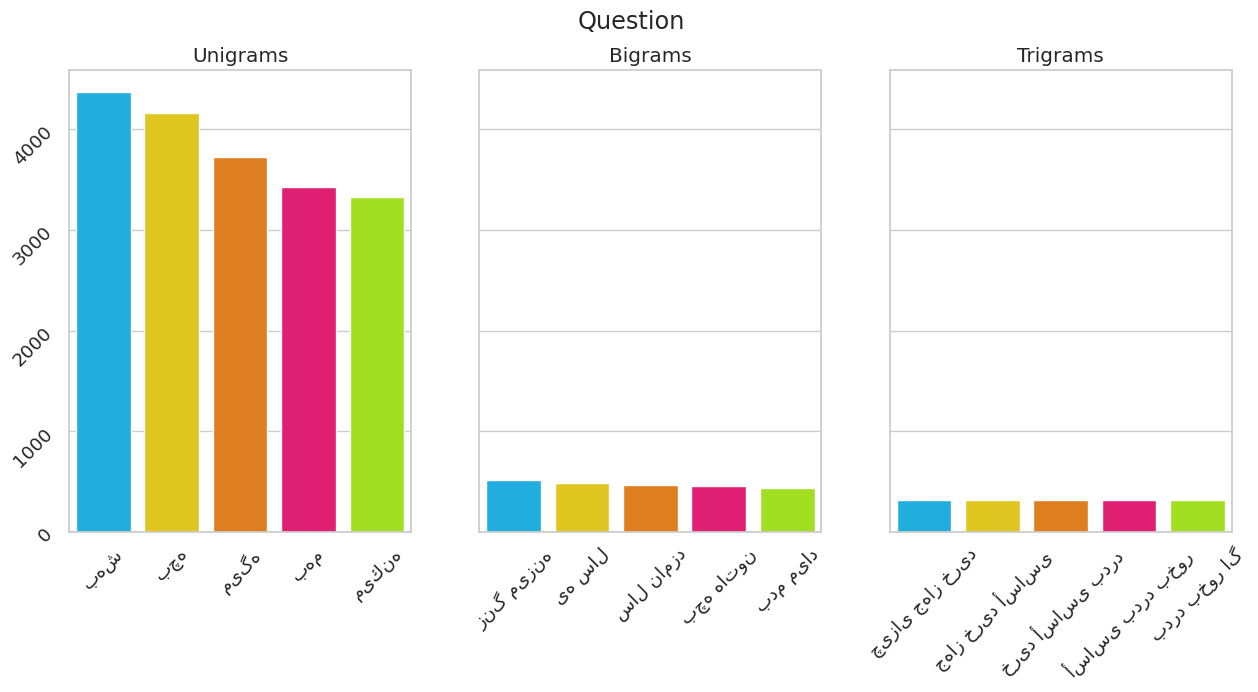

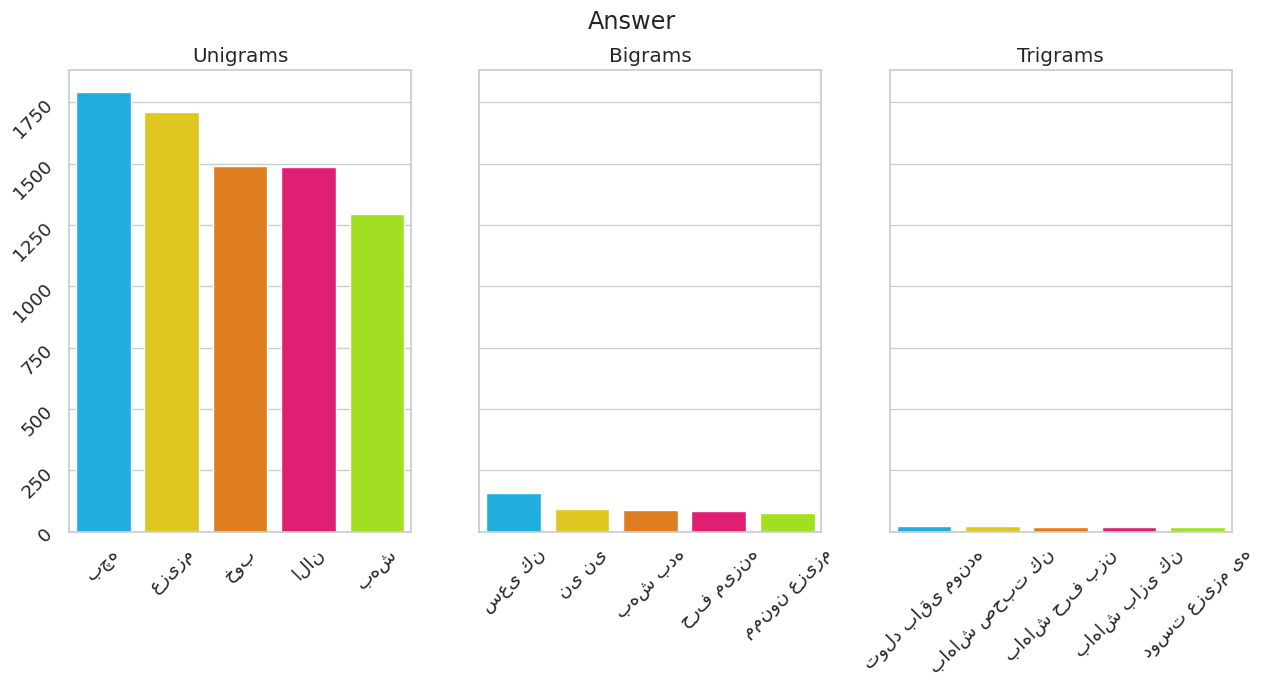

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Question')

sns.barplot(x=list(dict(Q_unigrams).keys()),y=list(dict(Q_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(Q_bigrams).keys()), y=list(dict(Q_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=list(dict(Q_trigrams).keys()),y=list(dict(Q_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Answer')

sns.barplot(x=list(dict(ans_unigrams).keys()),y=list(dict(ans_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(ans_bigrams).keys()), y=list(dict(ans_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(ans_trigrams).keys()),y=list(dict(ans_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


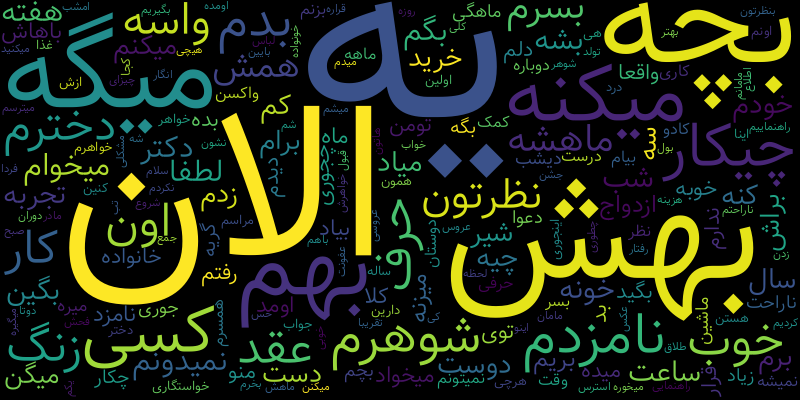

In [ ]:
wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400,no_reshape=True)
text = ' '.join([sntc for sntc in Q])
wc = wodcloud.generate(text)
wc.to_image()

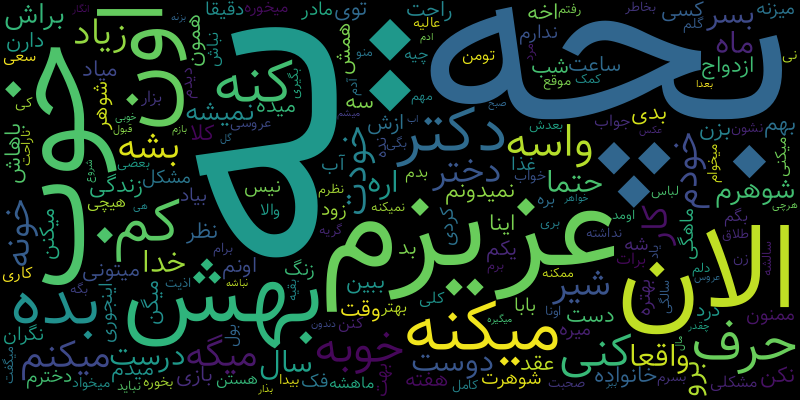

In [ ]:
text = ''
text = ' '.join([sntc for sntc in ans])
wc = wodcloud.generate(text)
wc.to_image()